 Fs=1000 hz
 Ts=0.001 s
[ 0.00324684  0.00963466  0.00644075 ... -0.0063349  -0.02230445
 -0.03188618]


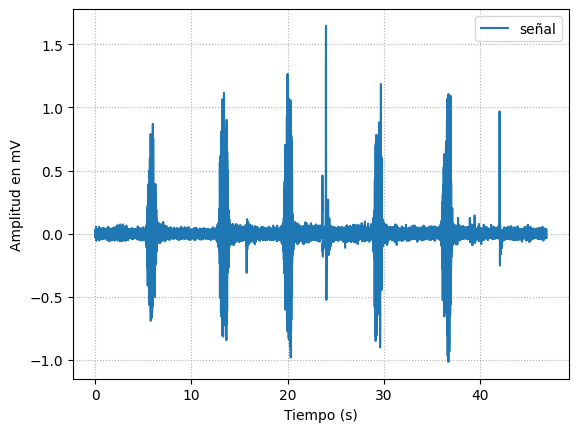

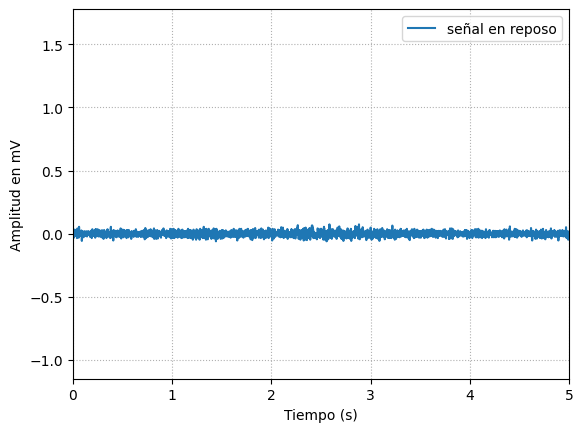

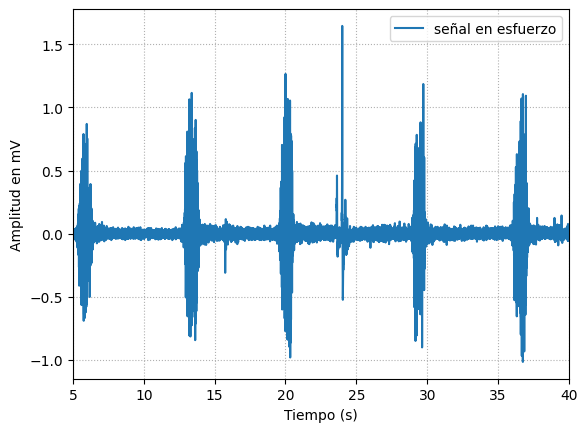

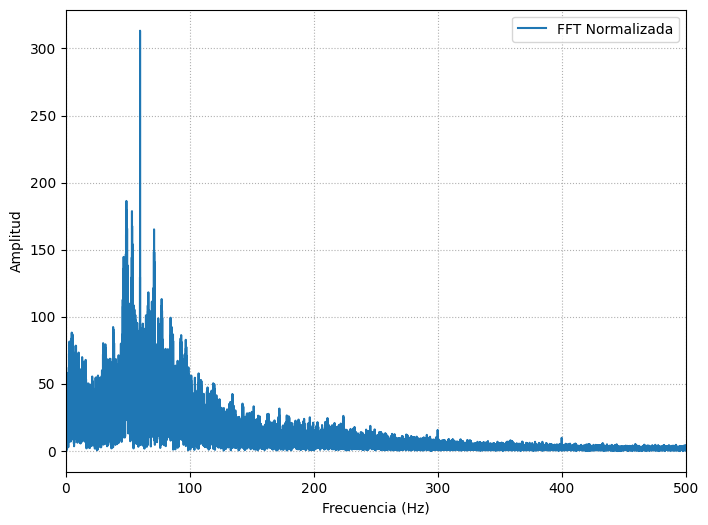

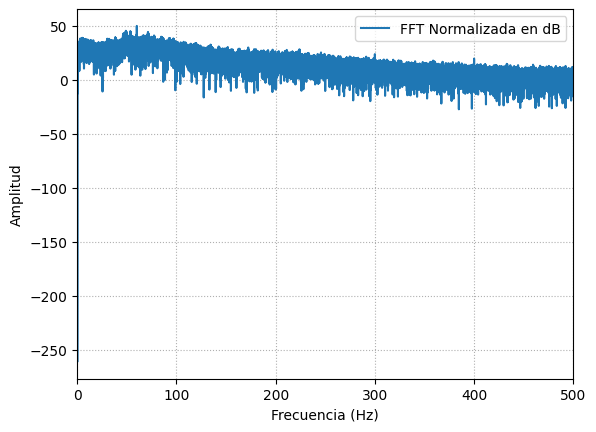

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

f = open("N.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./N.txt", delimiter="\t",skip_header = 3)
yarray = a[:, 5]
N=len(yarray)
bits = 10 # Bits de la salida
volt_range = 3.3
yarray = (yarray/2**bits -1/2) * volt_range/1009
yarray=yarray*1000 # convertir los bits a mV
yarray = yarray - np.mean(yarray) # Centrar la señal, ya que va de -1.64 a 1.64
xarray = np.arange(1, len(yarray)+1)/Fs
print(yarray)
xarray=xarray
plt.plot(xarray, yarray, label="señal")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud en mV")
plt.legend(loc="upper right")
plt.figure()
plt.plot(xarray, yarray, label="señal en reposo")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud en mV")
plt.legend(loc="upper right")
plt.xlim(0, 5)
plt.figure()
plt.plot(xarray, yarray, label="señal en esfuerzo")
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud en mV")
plt.legend(loc="upper right")
plt.xlim(5, 40)


# Calcular la FFT de la señal original
signal_fft = np.fft.fft(yarray)
frequencies = np.fft.fftfreq(N, Ts)

# Reorganizar las frecuencias para que estén en el rango de -Fs/2 a Fs/2
frequencies = np.fft.fftshift(frequencies)
signal_fft = np.fft.fftshift(signal_fft)


# Graficar la FFT normalizada
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(signal_fft), label="FFT Normalizada")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)  # Limitar el rango de frecuencias de 0 a Fs/2 Hz en la gráfica

plt.figure()
plt.plot(frequencies, 20*np.log10(np.abs(signal_fft)), label="FFT Normalizada en dB")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)

plt.show()
plt.show()